Продуктовый менеджер попросил проанализировать завершенные курсы онлайн-школы и ответить на следующие вопросы:

1. Сколько студентов успешно завершили только один курс? (Успешная сдача = зачёт на экзамене).

2. Выявить самый сложный и самый простой экзамен: курсы или экзамены в рамках курса, которые обладают самой низкой и самой высокой завершаемостью (завершаемость = кол-во успешных экзаменов / попыток сдать экзамен)

3. По каждому предмету определить средний срок сдачи экзаменов (под сдачей понимается последнее успешное прохождение экзамена студентом).

4. Выявить самые популярные курсы (ТОП-3) по количеству регистраций на них. А также курсы с самым большим оттоком (ТОП-3).

5. Написать функцию на python, позволяющую строить когортный (семестровый) анализ. В период с начала 2013 по конец 2014 выявить семестр с самой низкой завершаемостью курсов.

6. Используя python, построить RFM-кластеры студентов, где R - среднее время сдачи одного экзамена, F - завершаемость курсов, M - среднее количество баллов, получаемое за экзамен. Для каждого RFM-сегмента построить границы метрик recency, frequency и monetary для интерпретации этих кластеров.

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
assessments = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-bykov/project_1/assessments.csv')
courses = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-bykov/project_1/courses.csv')
studentAssessment = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-bykov/project_1/studentAssessment.csv')
studentRegistration = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-bykov/project_1/studentRegistration.csv')

Задача 1: Сколько студентов успешно сдали только один курс?

In [ ]:
assessments.head(3)
'''
code_module — код предмета;
code_presentation — код семестра;
id_assessment — код теста;
assessment_type — тип теста: оценка преподавателя (TMA), компьютерная оценка (СМА), экзамен (Exam);
date — дата сдачи теста. Рассчитывается как количество дней с момента начала семестра. Дата начала семестра имеет номер 0;
weight — процентный вес теста в оценке за курс. Обычно экзамены рассматриваются отдельно и имеют вес 100%; сумма остальных оценок составляет 100%.
'''

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0


In [ ]:
assessments.groupby(['code_module','id_assessment', 'assessment_type'], as_index = False ) \
           .agg({'code_presentation':'count'})

,code_module,id_assessment,assessment_type,code_presentation
0,AAA,1752,TMA,1
1,AAA,1753,TMA,1
2,AAA,1754,TMA,1
3,AAA,1755,TMA,1
4,AAA,1756,TMA,1
...,...,...,...,...
201,GGG,37440,CMA,1
202,GGG,37441,CMA,1
203,GGG,37442,CMA,1
204,GGG,37443,CMA,1


In [ ]:
assessments

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0
...,...,...,...,...,...,...
201,GGG,2014J,37443,CMA,229.0,0.0
202,GGG,2014J,37435,TMA,61.0,0.0
203,GGG,2014J,37436,TMA,124.0,0.0
204,GGG,2014J,37437,TMA,173.0,0.0


In [ ]:
studentAssessment
'''
Если учащийся не отправляет работу на оценку, результат не записывается в таблицу.
id_assessment — номер теста;
id_student — номер студента;
date_submitted — дата сдачи теста, измеряемая как количество дней с начала семестра;
is_banked — факт перезачета теста с прошлого семестра;
score — оценка учащегося в этом тесте (от 0 до 100). Оценка ниже 40 - неудачная сдача теста.
'''

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0
...,...,...,...,...,...
173907,37443,527538,227,0,60.0
173908,37443,534672,229,0,100.0
173909,37443,546286,215,0,80.0
173910,37443,546724,230,0,100.0


In [ ]:
studentAssessment_full = studentAssessment.merge(assessments, on = 'id_assessment', how = 'left')

In [ ]:
studentAssessment_full.head(5)

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0


In [ ]:
# отбираем успешно сданные тесты
studentAssessmentSuccess_full_pass = studentAssessment_full.loc[studentAssessment['score'] >= 40]

In [ ]:
# отбираем успешно сданные экзамены
studentAssessmentSuccess_full_pass = studentAssessment_full.loc[studentAssessment_full['assessment_type'] == 'Exam']

In [ ]:
studentAssessmentSuccess_full_pass.size

49590

In [ ]:
studentAssessmentSuccess_full_pass.head(3)

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
52923,24290,558914,230,0,32.0,CCC,2014B,Exam,NaN,100.0
52924,24290,559706,234,0,78.0,CCC,2014B,Exam,NaN,100.0
52925,24290,559770,230,0,54.0,CCC,2014B,Exam,NaN,100.0


In [ ]:
studentAssessmentSuccess_full_pass = studentAssessmentSuccess_full_pass.groupby (['id_student'], as_index = False) \
                            .agg({'score':'count'}) \
                            .rename(columns = {'score':'tests_passed'}) \
                            .query('tests_passed == 1')

In [ ]:
# количество студентов, сдавших только 1 экзамен
studentAssessmentSuccess_full_pass.id_student.nunique()

4307

_________________________________________________________________________________________________

Задача 2: выявить самый сложный и самый простой экзамен

In [ ]:
studentAssessment.nunique()

id_assessment       188
id_student        23369
date_submitted      312
is_banked             2
score               101
dtype: int64

In [ ]:
studentAssessment.dtypes

id_assessment       int64
id_student          int64
date_submitted      int64
is_banked           int64
score             float64
dtype: object

In [ ]:
# добавим столбец с признаком успешного прохождения теста; True = успешно
studentAssessment['PassOrFail'] = studentAssessment.score >= 40

In [ ]:
studentAssessment.head()

,id_assessment,id_student,date_submitted,is_banked,score,PassOrFail
0,1752,11391,18,0,78.0,True
1,1752,28400,22,0,70.0,True
2,1752,31604,17,0,72.0,True
3,1752,32885,26,0,69.0,True
4,1752,38053,19,0,79.0,True


In [ ]:
hardest_and_easiest_assesment =  studentAssessment.groupby(['id_assessment', 'PassOrFail'], as_index = False) \
                 .agg({'id_student': 'count'}) \
                 .rename(columns={'id_student':'number_of_attempts'}) \
                 .pivot(index = 'id_assessment', columns='PassOrFail', values='number_of_attempts') \
                 .reset_index() \
                 .rename(columns={False:'Usuccess',True:'Success'})

In [ ]:
hardest_and_easiest_assesment

PassOrFail,id_assessment,Usuccess,Success
0,1752,7.0,352.0
1,1753,12.0,330.0
2,1754,6.0,325.0
3,1755,9.0,294.0
4,1756,8.0,290.0
...,...,...,...
183,37439,1.0,503.0
184,37440,13.0,466.0
185,37441,3.0,470.0
186,37442,20.0,396.0


In [ ]:
hardest_and_easiest_assesment['HardOrEasy'] = hardest_and_easiest_assesment.Success / ( hardest_and_easiest_assesment.Usuccess + hardest_and_easiest_assesment.Success)

In [ ]:
hardest_and_easiest_assesment.head()

PassOrFail,id_assessment,Usuccess,Success,HardOrEasy
0,1752,7.0,352.0,0.980501
1,1753,12.0,330.0,0.964912
2,1754,6.0,325.0,0.981873
3,1755,9.0,294.0,0.970297
4,1756,8.0,290.0,0.973154


In [ ]:
# самый простой тест (высокая завершаемость)
hardest_and_easiest_assesment.loc[hardest_and_easiest_assesment.HardOrEasy.idxmax()]

PassOrFail
id_assessment    34878.00000
Usuccess             1.00000
Success           1469.00000
HardOrEasy           0.99932
Name: 130, dtype: float64

In [ ]:
# самый сложный тест (низкая завершаемость)
hardest_and_easiest_assesment.loc[hardest_and_easiest_assesment.HardOrEasy.idxmin()]

PassOrFail
id_assessment    15020.000000
Usuccess           736.000000
Success           1040.000000
HardOrEasy           0.585586
Name: 43, dtype: float64

In [ ]:
#  Тест 34878 самый легкий, тест 15020 самый сложный

__________________________________________________________________________________

Задача 3: посчитать средний срок сдачи экзаменов по каждому предмету

In [ ]:
studentAssessment_full.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0


In [ ]:
studentAssessment_full_last_succ = studentAssessment_full.loc[studentAssessment['score'] >= 40]

In [ ]:
studentAssessment_full_last_succ = studentAssessment_full_last_succ.loc[studentAssessment_full_last_succ['assessment_type'] == 'Exam']

In [ ]:
studentAssessment_full_last_succ.id_assessment.unique()

array([24290, 24299, 25340, 25354, 25361, 25368])

In [ ]:
  # датафрейм с данными по успешно сданным экзаменам
studentAssessment_full_last_succ.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
52924,24290,559706,234,0,78.0,CCC,2014B,Exam,NaN,100.0
52925,24290,559770,230,0,54.0,CCC,2014B,Exam,NaN,100.0
52926,24290,560114,230,0,64.0,CCC,2014B,Exam,NaN,100.0
52927,24290,560311,234,0,100.0,CCC,2014B,Exam,NaN,100.0
52928,24290,560494,230,0,92.0,CCC,2014B,Exam,NaN,100.0


In [ ]:
studentAssessment_full_last_succ = studentAssessment_full_last_succ.sort_values(['id_student', 'date_submitted'])

In [ ]:
studentAssessment_full_last_succ.id_student.nunique

<bound method IndexOpsMixin.nunique of 64812      23698
87448      24213
64813      27116
83014      28046
64814      28787
          ...   
87970    2694886
70241    2694933
83013    2695608
53369    2697181
87971    2698251
Name: id_student, Length: 4392, dtype: int64>

In [ ]:
studentAssessment_full_last_succ = studentAssessment_full_last_succ.drop_duplicates('id_student', keep='last')

In [ ]:
studentAssessment_full_last_succ.id_student.nunique

<bound method IndexOpsMixin.nunique of 64812      23698
87448      24213
64813      27116
83014      28046
64814      28787
          ...   
87970    2694886
70241    2694933
83013    2695608
53369    2697181
87971    2698251
Name: id_student, Length: 4097, dtype: int64>

In [ ]:
studentAssessment_full_last_succ.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
64812,24299,23698,243,0,80.0,CCC,2014J,Exam,NaN,100.0
87448,25361,24213,236,0,58.0,DDD,2014B,Exam,241.0,100.0
64813,24299,27116,243,0,96.0,CCC,2014J,Exam,NaN,100.0
83014,25354,28046,237,0,40.0,DDD,2013J,Exam,261.0,100.0
64814,24299,28787,243,0,44.0,CCC,2014J,Exam,NaN,100.0


In [ ]:
# группируем и считаем средний срок сдачи для каждого экзамена
studentAssessment_full_last_succ.groupby('id_assessment', as_index = False) \
                                .agg({'date_submitted':'mean'}).round(0)

,id_assessment,date_submitted
0,24290,232.0
1,24299,244.0
2,25340,230.0
3,25354,240.0
4,25361,235.0
5,25368,243.0


___________________________________________________

Задача 4: Выявить самые популярные курсы, а также курсы с самым большим оттоком.

In [ ]:
studentRegistration.head()
'''
code_module — код предмета;
code_presentation — код семестра;
id_student — номер студента;
date_registration — дата регистрации студента (количество дней от начала семестра, -30 означает, что студент зарегистрировался за 30 дней до начала);
date_unregistration — дата отмены регистрации студента с предмета. У студентов, окончивших курс, это поле остается пустым.
'''

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [ ]:
# посмотрим, какие курсы преподавались в этот период
studentRegistration.code_module.unique()

array(['AAA', 'BBB', 'CCC', 'DDD', 'EEE', 'FFF', 'GGG'], dtype=object)

In [ ]:
# три самых популярных курса по количеству регистраций
studentRegistration.query('date_unregistration == "NaN"') \
                   .groupby('code_module', as_index = False) \
                   .agg({'id_student':'count'}) \
                   .sort_values('id_student') \
                   .tail(3)

,code_module,id_student
3,DDD,4037
5,FFF,5382
1,BBB,5532


In [ ]:
# три курса с самым большим оттоком
studentRegistration.query('date_unregistration != "NaN"') \
                   .groupby('code_module', as_index = False) \
                   .agg({'id_student':'count'}) \
                   .sort_values('id_student') \
                   .tail(3)

,code_module,id_student
3,DDD,2235
1,BBB,2377
5,FFF,2380


_______________________________________________________________________________________

Задача 5: выполнить когортный (семестровый) анализ на Python. Найти семестр с самой низкой завершаемостью курсов за период с начала 2013 по конец 2014.

In [ ]:
'''
Для проведения когортного анализа нужно задать 4 параметра:
- Признак формирования когорты — действие, которое объединяет людей в группу;
- Размер когорты — период времени, в течение которого сформировалась когорта;
- Отчетный период (в нашем случае - 2 года);
- Анализируемый ключевой показатель (в нашем случае - завершаемость курсов)
'''

In [ ]:
# посчитаем количество семестров в отчетном периоде
studentRegistration.code_presentation.unique()

array(['2013J', '2014J', '2013B', '2014B'], dtype=object)

In [ ]:
'''
В европейской системе месяц начала курса обозначается буквами алфавита, где A - January, B - February и т.д.
Таким образом, B - второй семестр, J - первый семестр соответствующего года.
В качестве признака когорты выбираем регистрацию на курс, в качестве размера когорты выбираем семестр, в котором студент начал обучение.
Итого получаем 4 когорты.
'''

In [ ]:
studentAssessment_full.code_module.unique()

array(['AAA', 'BBB', 'CCC', 'DDD', 'EEE', 'FFF', 'GGG'], dtype=object)

In [ ]:
#  функция, задающая когорты
def cohort_identification(x):
    if x == '2013J':
        return('cohort_1')
    elif x == '2013B':
        return('cohort_2')
    elif x == '2014J':
        return('cohort_3')
    else:
        return('cohort_4')

In [ ]:
# добавим столбец с информацией о принадлежности к когорте
studentRegistration['cohort'] = studentRegistration.code_presentation.apply(cohort_identification)

In [ ]:
studentRegistration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration,cohort
0,AAA,2013J,11391,-159.0,NaN,cohort_1
1,AAA,2013J,28400,-53.0,NaN,cohort_1
2,AAA,2013J,30268,-92.0,12.0,cohort_1
3,AAA,2013J,31604,-52.0,NaN,cohort_1
4,AAA,2013J,32885,-176.0,NaN,cohort_1


In [ ]:
studentAssessment.head()

,id_assessment,id_student,date_submitted,is_banked,score,PassOrFail
0,1752,11391,18,0,78.0,True
1,1752,28400,22,0,70.0,True
2,1752,31604,17,0,72.0,True
3,1752,32885,26,0,69.0,True
4,1752,38053,19,0,79.0,True


In [ ]:
# собираем вместе информацию об успеваемости и принадлежности к когорте
cohorts_stats = studentAssessment.merge(studentRegistration, on = 'id_student', how = 'left')

In [ ]:
cohorts_stats.head()

,id_assessment,id_student,date_submitted,is_banked,score,PassOrFail,code_module,code_presentation,date_registration,date_unregistration,cohort
0,1752,11391,18,0,78.0,True,AAA,2013J,-159.0,NaN,cohort_1
1,1752,28400,22,0,70.0,True,AAA,2013J,-53.0,NaN,cohort_1
2,1752,31604,17,0,72.0,True,AAA,2013J,-52.0,NaN,cohort_1
3,1752,32885,26,0,69.0,True,AAA,2013J,-176.0,NaN,cohort_1
4,1752,38053,19,0,79.0,True,AAA,2013J,-110.0,NaN,cohort_1


In [ ]:
# фильтруем успешно сдавших тесты
cohorts_stats_passed = cohorts_stats.query('score >= 40') \
             .groupby(['cohort','code_presentation', 'code_module'], as_index = False) \
             .agg({'id_student':'count'})

In [ ]:
# считаем среднее количество сдавших по когортам
cohorts_stats.query('score >= 40') \
             .groupby(['cohort','code_presentation', 'code_module'], as_index = False) \
             .agg({'id_student':'count'}) \
             .groupby('code_presentation', as_index = False) \
             .agg({'id_student':'mean'}) \
             .rename(columns = {'id_student': 'students_passed_avg'})

,code_presentation,students_passed_avg
0,2013B,11523.000000
1,2013J,8977.833333
2,2014B,7884.833333
3,2014J,8763.714286


In [ ]:
# 2 семестр 2014 года отличается самой низкой средней завершаемостью

_____________________________________________________________________

Задача 6: построить RFM-кластеры студентов

In [ ]:
# в качестве метрики R принимаем среднее время сдачи одного экзамена

In [ ]:
assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [ ]:
# массив с уникальными значениями сроков сдачи
assessments.date.unique()

array([ 19.,  54., 117., 166., 215.,  nan,  89., 124., 159., 187.,  47.,
        96., 131., 208.,  82., 152., 194.,  12.,  40., 110., 201.,  18.,
        67., 137., 207.,  32., 102., 151., 200., 144., 214., 109., 158.,
        23.,  51.,  79., 114., 149., 170., 206.,  25.,  53.,  81., 116.,
       240.,  88., 123., 165., 261.,  74., 241.,  20.,  41.,  62., 111.,
       146., 195.,  33.,  68., 235., 228., 222., 236., 173., 227.,  24.,
        52.,  87., 129., 171.,  94., 136., 199., 229.,  61.])

In [ ]:
# датафрейм, содержащий данные о среднем сроке сдачи каждого теста
assessments_rfm =  assessments.dropna().groupby('id_assessment', as_index = False) \
                                       .agg({'date':'mean'}) \
                                       .sort_values('date')

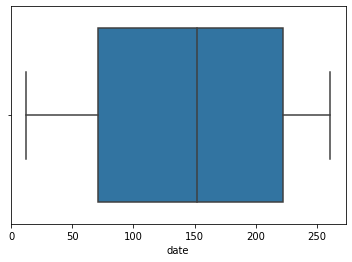

In [ ]:
# визуализация распределения средних сроков сдачи
sns.boxplot(assessments_rfm.date)

In [ ]:
# описательные статистики массива для выделения кластеров
assessments_rfm.describe()

,id_assessment,date
count,195.000000,195.000000
mean,26851.056410,145.005128
std,9830.992674,76.001119
min,1752.000000,12.000000
25%,24282.500000,71.000000
50%,25367.000000,152.000000
75%,34892.500000,222.000000
max,37444.000000,261.000000


In [ ]:
'''
Задаем кластеры для метрики Recency:
1: меньше или равно 71 дня;
2: от 72 до 152 дней;
3: от 153 до 222 дней;
4: 223 дня и больше
'''

In [ ]:
# в качестве метрики F принимаем процент завершаемости курсов
studentAssessment.head()

,id_assessment,id_student,date_submitted,is_banked,score,PassOrFail
0,1752,11391,18,0,78.0,True
1,1752,28400,22,0,70.0,True
2,1752,31604,17,0,72.0,True
3,1752,32885,26,0,69.0,True
4,1752,38053,19,0,79.0,True


In [ ]:
# фильтруем сдавших и аггрегируем по количеству сданных тестов
studentAssessment_F_rate = studentAssessment.query('PassOrFail == True').groupby(['id_student'], as_index = False) \
                 .agg({'PassOrFail':'count'})

In [ ]:
# добавим столбец с коэффициентом завершаемости (относительно максимального числа сданных тестов)
studentAssessment_F_rate['F_rate'] =  studentAssessment_F_rate.PassOrFail / studentAssessment_F_rate.PassOrFail.max()

In [ ]:
studentAssessment_F_rate.head()

,id_student,PassOrFail,F_rate
0,6516,5,0.178571
1,8462,7,0.250000
2,11391,5,0.178571
3,23629,4,0.142857
4,23698,9,0.321429


/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



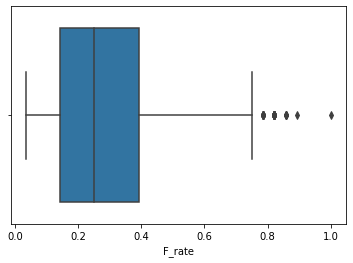

In [ ]:
# визуализируем распределение
sns.boxplot(studentAssessment_F_rate.F_rate)

In [ ]:
# описательные статистики массива для выделения кластеров
studentAssessment_F_rate.F_rate.describe()

count    22973.000000
mean         0.258317
std          0.149005
min          0.035714
25%          0.142857
50%          0.250000
75%          0.392857
max          1.000000
Name: F_rate, dtype: float64

In [ ]:
'''
Задаем кластеры для метрики Frequency:
1: меньше или равно 14.3%;
2: от 14.4% до 25%;
3: от 25% до 39.3%;
4: от 39,3% и выше
'''

In [ ]:
# в качестве метрики M принимаем количество баллов, полученное по результатам тестов/экзаменов

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



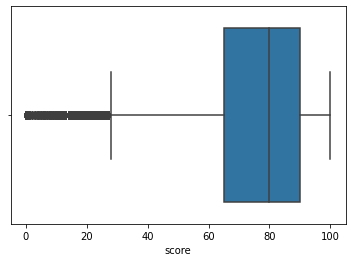

In [ ]:
# визуализируем распределение количества баллов
sns.boxplot(studentAssessment.score)

In [ ]:
# описательные статистики массива для выделения кластеров
studentAssessment.score.describe()

count    173739.000000
mean         75.799573
std          18.798107
min           0.000000
25%          65.000000
50%          80.000000
75%          90.000000
max         100.000000
Name: score, dtype: float64

In [ ]:
'''
Задаем кластеры для метрики Monetary:
1: меньше или равно 65 баллов;
2: от 66 до 80 баллов;
3: от 81 до 90 баллов;
4: 91 балл и выше.
,,,